In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('titanic.csv')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df = df1[["Survived",'Sex','Age','Fare']]

In [4]:
df.head()

,Survived,Sex,Age,Fare
0,0,male,22.0,7.2500
1,1,female,38.0,71.2833
2,1,female,26.0,7.9250
3,1,female,35.0,53.1000
4,0,male,35.0,8.0500


In [5]:
le = LabelEncoder()

In [6]:
df['sex_n'] = le.fit_transform(df['Sex'])

<ipython-input-6-6b0800fc51bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex_n'] = le.fit_transform(df['Sex'])


In [7]:
df.tail()

,Survived,Sex,Age,Fare,sex_n
886,0,male,27.0,13.00,1
887,1,female,19.0,30.00,0
888,0,female,NaN,23.45,0
889,1,male,26.0,30.00,1
890,0,male,32.0,7.75,1


In [8]:
df = df.drop('Sex',axis=1)

In [9]:
df.head()

,Survived,Age,Fare,sex_n
0,0,22.0,7.2500,1
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,1


In [24]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
sex_n         0
dtype: int64

In [25]:
df['Age'] = df['Age'].fillna(df['Age'].mean()) 

In [26]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
sex_n       0
dtype: int64

In [28]:
inputs = df.drop('Survived',axis=1)
inputs.head()

,Age,Fare,sex_n
0,22.0,7.2500,1
1,38.0,71.2833,0
2,26.0,7.9250,0
3,35.0,53.1000,0
4,35.0,8.0500,1


In [27]:
target = df['Survived']
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target, test_size=0.2,random_state=3)

In [30]:
model = DecisionTreeClassifier()

In [31]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
y_predicted = model.predict(X_test)

In [33]:
model.score(X_test, y_test)

0.7318435754189944

In [40]:
cm = confusion_matrix(y_test, y_predicted)

In [41]:
cm

array([[85, 24],
       [24, 46]], dtype=int64)

Text(33.0, 0.5, 'Predicted')

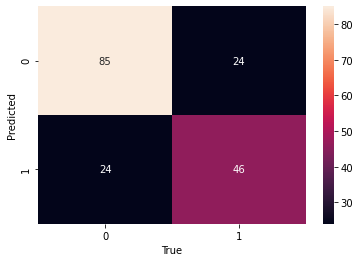

In [44]:
sns.heatmap(cm, annot = True)
plt.xlabel('True')
plt.ylabel('Predicted')